# 1000 Genomes PCA 

## Chris Porras
A notebook to visualize 1KGenomes PCA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
%matplotlib inline

### GT coding hist

(array([5.30532465e+09, 2.28747666e+08, 0.00000000e+00, 2.31172700e+06,
        0.00000000e+00, 1.29536000e+05, 1.56790000e+04, 0.00000000e+00,
        4.93300000e+03, 1.10000000e+02]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

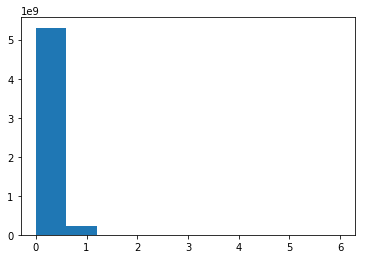

In [14]:
plt.hist(np.ravel(GT))

### Make df of all information necessary

In [368]:
def make_df(idx,pcs_filename):
    samp_id = np.load('sample_ids.npy')
    samp_id = samp_id[idx]
    key_arr = np.array(key['Individual ID'])
    pop = []
    for samp in samp_id:
        if samp in key_arr:
            pop.append(key.at[np.where(key_arr == samp)[0][0],'Population'])
    pop_code = pd.read_csv("../../data/20131219.populations.tsv", sep='\t')
    sup_pop = []
    pop_desc = []
    for p in pop:
        ind = np.where(pop_code['Population']==p)[0][0]
        sup_pop.append(pop_code.at[ind,'Super_Population'])
        pop_desc.append(pop_code.at[ind,'Population_Description'])
    PCs = np.load(pcs_filename)
#     PCs_std = (PCs.T/np.std(PCs,axis=1)).T
    PCs_std = PCs
    vals = {'PC1':PCs_std[0],
        'PC2':PCs_std[1],
        'PC3':PCs_std[2],
        'sample_id':samp_id,
        'Super_Population':sup_pop,
        'Population':pop,
        'Population_Description':pop_desc}
    df = pd.DataFrame(vals)
    return df

In [45]:
samp_id = np.load('sample_ids.npy')

In [89]:
key = pd.read_csv("../../data/20130606_g1k.ped", sep='\t')
key.head()

,Family ID,Individual ID,Paternal ID,Maternal ID,Gender,Phenotype,Population,Relationship,Siblings,Second Order,Third Order,Other Comments
0,BB01,HG01879,0,0,1,0,ACB,father,0,0,0,0
1,BB01,HG01880,0,0,2,0,ACB,mother,0,0,0,0
2,BB01,HG01881,HG01879,HG01880,2,0,ACB,child,0,0,0,0
3,BB02,HG01882,0,0,1,0,ACB,father,0,0,0,0
4,BB02,HG01883,0,0,2,0,ACB,mother,0,0,0,0


In [59]:
key_arr = np.array(key['Individual ID'])

In [126]:
pop = []
for samp in samp_id:
    if samp in key_arr:
        pop.append(key.at[np.where(key_arr == samp)[0][0],'Population'])

In [129]:
pop_code = pd.read_csv("../../data/20131219.populations.tsv", sep='\t')

In [177]:
sup_pop = []
pop_desc = []
for p in pop:
    ind = np.where(pop_code['Population']==p)[0][0]
    sup_pop.append(pop_code.at[ind,'Super_Population'])
    pop_desc.append(pop_code.at[ind,'Population_Description'])

In [203]:
PCs = np.load('pcs_arr.npy')

In [205]:
PCs_std = (PCs.T/np.std(PCs,axis=1)).T

In [207]:
vals = {'PC1':PCs_std[0],
        'PC2':PCs_std[1],
        'PC3':PCs_std[2],
        'sample_id':samp_id,
        'Super_Population':sup_pop,
        'Population':pop,
        'Population_Description':pop_desc}
df = pd.DataFrame(vals)
df.head()
df.to_csv('total_pc_key.csv')

#### Vizualize by superpopulation

In [188]:
import plotly
fig = px.histogram(df, x='Population_Description',
                    color = "Super_Population")
fig.update_xaxes(tickfont=dict(size=16))
# plotly.offline.plot(fig, filename='total_dist.html') 
fig.show()

In [211]:
fig = px.histogram(df, x='Super_Population',
                    color = "Super_Population")
fig.update_xaxes(tickfont=dict(size=16))

# plotly.offline.plot(fig, filename='sup_pop_dist.html') 
fig.show()

In [208]:
fig = px.scatter(df, x='PC1',
                     y='PC2',
                    color = "Super_Population")
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(
        family="Courier New, monospace",
        size=20
    )
)

# plotly.offline.plot(fig, filename='total_pc1_pc2.html') 
fig.show()

In [209]:
fig = px.scatter_3d(df, x='PC1',
                     y='PC2',
                    z = 'PC3',
                    color = "Super_Population")
fig.update_layout(margin=dict(l=10, r=0, b=0, t=0))

# plotly.offline.plot(fig, filename='total_pc1_pc2_pc3.html')
fig.show()

## Downsample from 1K Genomes

### Even sample of SAS,EUR,EAS

In [240]:
no_amr_afr = df.loc[(df['Super_Population']!='AMR')].loc[df['Super_Population']!='AFR']
no_amr_afr.shape
no_amr_afr.to_csv('no_amr_afr.csv')

In [249]:
sub_samp = np.array(no_amr_afr['sample_id'])
sub_samp.shape

(1496,)

In [256]:
idx = []
for i in range(len(samp_id)):
    if samp_id[i] in sub_samp:
        idx += [i]

In [371]:
idx_euras = idx
euras_df = make_df(idx_euras,'pcs_arr_as.npy')
euras_df.to_csv('eurasian_sample.csv')

In [372]:
euras_df

,PC1,PC2,PC3,sample_id,Super_Population,Population,Population_Description
0,106398.931982,21354.108847,829.588805,HG00096,EUR,GBR,British in England and Scotland
1,115054.089854,34932.758417,11008.747524,HG00097,EUR,GBR,British in England and Scotland
2,103394.031500,22934.549932,-19261.891539,HG00099,EUR,GBR,British in England and Scotland
3,93802.105370,31833.457018,-14506.485816,HG00100,EUR,GBR,British in England and Scotland
4,105928.492500,26074.598961,-13525.456991,HG00101,EUR,GBR,British in England and Scotland
5,105358.990744,21156.087128,-8161.804812,HG00102,EUR,GBR,British in England and Scotland
6,111818.124929,22546.782833,4990.487526,HG00103,EUR,GBR,British in England and Scotland
7,110538.770740,25732.653650,-6060.290477,HG00105,EUR,GBR,British in England and Scotland
8,79578.969467,22098.703321,10824.559301,HG00106,EUR,GBR,British in England and Scotland
9,105685.590524,26941.915598,13926.778374,HG00107,EUR,GBR,British in England and Scotland


In [316]:
fig = px.histogram(euras_df, x='Population_Description',
                    color = "Super_Population")
fig.update_xaxes(tickfont=dict(size=16))

# plotly.offline.plot(fig, filename='total_dist.html') 
fig.show()

In [408]:
euras_df.PC1 = -1*euras_df.PC1

In [409]:

fig = px.scatter(euras_df, x='PC1',
                     y='PC2',
                    color = "Super_Population")
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(
        family="Courier New, monospace",
        size=20
    )
)

# plotly.offline.plot(fig, filename='euras_pc1_pc2.html') 
fig.show()

### Overrepresent EUR

In [293]:
np.random.seed(1)

In [298]:
SAS_arr = np.array(euras_df[euras_df['Super_Population'] == 'SAS'].index)
EAS_arr = np.array(euras_df[euras_df['Super_Population'] == 'EAS'].index)
EUR_arr = np.array(euras_df[euras_df['Super_Population'] == 'EUR'].index)

In [299]:
SAS_idx = np.random.choice(SAS_arr,len(SAS_arr)//2)
EAS_idx = np.random.choice(EAS_arr,len(SAS_arr)//2)

In [308]:
samp_ind = np.sort(np.append(np.append(EUR_arr,EAS_idx),SAS_idx))

In [346]:
new_samp_idx = []
ids_chosen = np.array(euras_df.iloc[samp_ind].sample_id)
for i in range(len(samp_id)):
    if samp_id[i] in ids_chosen:
        new_samp_idx += [i]

In [375]:
samp_df = make_df(new_samp_idx,'pcs_arr_samp.npy')
samp_df.to_csv('mixed_representation_eurasian_sample.csv')

In [376]:
samp_df.head()

,PC1,PC2,PC3,sample_id,Super_Population,Population,Population_Description
0,-54986.496676,5976.026529,2631.183648,HG00096,EUR,GBR,British in England and Scotland
1,-63628.567778,14094.406329,8108.054142,HG00097,EUR,GBR,British in England and Scotland
2,-53057.045850,6409.048013,-17893.752057,HG00099,EUR,GBR,British in England and Scotland
3,-47360.400549,11358.845705,-12556.092070,HG00100,EUR,GBR,British in England and Scotland
4,-55612.704446,8738.797660,-10062.301955,HG00101,EUR,GBR,British in England and Scotland


In [365]:
fig = px.histogram(samp_df, x='Population_Description',
                    color = "Super_Population")
fig.update_xaxes(tickfont=dict(size=16))

# plotly.offline.plot(fig, filename='total_dist.html') 
fig.show()

In [410]:
px.scatter(euras_df, x='PC1',
                     y='PC2',
                    color = "Super_Population")

# px.update_layout(
#     xaxis_title="PC1",
#     yaxis_title="PC2",
#     font=dict(
#         family="Courier New, monospace",
#         size=20
#     )
# )

# plotly.offline.plot(fig, filename='euras_pc1_pc2.html') 
# px.show()

In [394]:
px.scatter(samp_df, x='PC1',
                     y='PC2',
                    color = "Super_Population") 

### Calculate distance in variances

In [463]:
euras_EUR = euras_df.loc[euras_df['Super_Population'] == 'EUR']
euras_SAS = euras_df.loc[euras_df['Super_Population'] == 'SAS']
euras_EUR_SAS = euras_df.loc[euras_df['Super_Population'] != 'EAS']

#### EUR and SAS

In [464]:
ctr_EUR = np.mean(euras_EUR.iloc[:,:3])
ctr_SAS = np.mean(euras_SAS.iloc[:,:3])
dis_eursas = np.abs(ctr_EUR - ctr_SAS)

In [465]:
var_in = np.var(euras_EUR.iloc[:,:3])
var_out = np.var(euras_EUR_SAS.iloc[:,:3])
eursas_var = var_in/var_out

In [466]:
samp_EUR = samp_df.loc[samp_df['Super_Population'] == 'EUR']
samp_SAS = samp_df.loc[samp_df['Super_Population'] == 'SAS']
samp_EUR_SAS = samp_df.loc[samp_df['Super_Population'] != 'EAS']

In [467]:
ctr_EUR = np.mean(samp_EUR.iloc[:,:3])
ctr_SAS = np.mean(samp_SAS.iloc[:,:3])
dis_samp_eursas = np.abs(ctr_EUR - ctr_SAS)

In [468]:
var_in = np.var(samp_EUR.iloc[:,:3])
var_out = np.var(samp_EUR_SAS.iloc[:,:3])
eursas_samp_var = var_in/var_out

#### EUR and EAS

In [469]:
euras_EAS = euras_df.loc[euras_df['Super_Population'] == 'EAS']
euras_EUR_EAS = euras_df.loc[euras_df['Super_Population'] != 'SAS']

In [470]:
ctr_EUR = np.mean(euras_EUR.iloc[:,:3])
ctr_EAS = np.mean(euras_EAS.iloc[:,:3])
dis_eureas = np.abs(ctr_EUR - ctr_EAS)

In [471]:
var_in = np.var(euras_EUR.iloc[:,:3])
var_out = np.var(euras_EUR_EAS.iloc[:,:3])
eureas_var = var_in/var_out

In [472]:
samp_EAS = samp_df.loc[samp_df['Super_Population'] == 'EAS']
samp_EUR_EAS = samp_df.loc[samp_df['Super_Population'] != 'SAS']

In [473]:
ctr_EUR = np.mean(samp_EUR.iloc[:,:3])
ctr_EAS = np.mean(samp_EAS.iloc[:,:3])
dis_samp_eureas = np.abs(ctr_EUR - ctr_EAS)

In [474]:
var_in = np.var(samp_EUR.iloc[:,:3])
var_out = np.var(samp_EUR_EAS.iloc[:,:3])
eureas_samp_var = var_in/var_out

#### Compile distances

In [504]:
my_val = {'Centroid distance between EUR and EAS': dis_eureas,
         'with sampling': dis_samp_eureas,
         'difference':dis_eureas - dis_samp_eureas}
dis_df = pd.DataFrame(my_val)
dis_df

,Centroid distance between EUR and EAS,with sampling,difference
PC1,220885.950100,160553.668842,60332.281258
PC2,14056.942182,3978.838365,10078.103818
PC3,482.390661,50.782197,431.608464


In [506]:
my_val = {'Centroid distance between EUR and SAS': dis_eursas,
         'with sampling': dis_samp_eursas,
         'difference':dis_eursas - dis_samp_eursas}
dis_df = pd.DataFrame(my_val)
dis_df

,Centroid distance between EUR and SAS,with sampling,difference
PC1,62437.617448,59141.526835,3296.090614
PC2,56795.615157,36291.564916,20504.050241
PC3,1060.476594,1104.713791,-44.237197


In [507]:
my_val = {'Variance fraction EUR and SAS': eursas_var,
         'with sampling': eursas_samp_var,
         'difference': eursas_var - eursas_samp_var
         }
dis_df = pd.DataFrame(my_val)
dis_df

,Variance fraction EUR and SAS,with sampling,difference
PC1,0.202979,0.161069,0.041909
PC2,0.057030,0.100926,-0.043895
PC3,1.082985,1.055380,0.027604


In [508]:
my_val = {'Variance fraction EUR and EAS': eureas_var,
         'with sampling': eureas_samp_var,
         'difference': eureas_var - eureas_samp_var
         }
dis_df = pd.DataFrame(my_val)
dis_df

,Variance fraction EUR and EAS,with sampling,difference
PC1,0.020744,0.025942,-0.005198
PC2,0.492824,0.872629,-0.379804
PC3,1.318590,1.158439,0.160151
